In [1]:
import numpy
import pandas as pd
from sklearn import preprocessing
import keras

Using TensorFlow backend.


In [2]:
all_df = pd.read_csv("train.csv")

In [3]:
all_df[:100]

,sexuality,age,Education,rank,militaryservice,Time,testResult,suicideHistory,hadSuicideMessage,confirmedDisease,emotionalProblems,mentalillness,familySuicideHistory,familyMembers,workplacePressure,EconomicIssues,personalPressure,suicide
0,male,22,s,soldier,v,L,adaptWellType,0,0,0,0,0,0,0,0,0,0,1
1,male,20,s,soldier,v,S,adaptWellType,0,0,0,0,0,0,0,1,0,0,1
2,male,20,s,soldier,c,S,generalType,0,1,1,0,0,1,0,1,0,0,1
3,male,21,s,soldier,c,S,needCareType,0,0,0,1,0,0,0,0,0,0,1
4,male,30,u,officer,v,L,NaN,0,1,0,1,0,0,0,0,0,0,1
5,male,30,u,officer,v,M,adaptWellType,0,0,0,0,0,0,0,1,1,0,1
6,male,28,u,sergeant,v,L,adaptWellType,0,0,0,0,0,0,0,0,1,0,1
7,male,23,s,soldier,v,M,adaptWellType,0,1,0,0,0,0,0,1,0,1,1
8,male,21,s,soldier,c,S,generalType,0,0,1,0,1,0,0,1,0,1,1
9,male,25,s,sergeant,v,L,adaptWellType,0,0,0,1,0,0,0,0,0,0,1


In [4]:
cols=['suicide', 'sexuality', 'age', 'Education', 'rank', 'militaryservice', 'Time','testResult', 'suicideHistory', 'hadSuicideMessage', 'confirmedDisease','emotionalProblems', 'mentalillness', 'familySuicideHistory','familyMembers', 'workplacePressure', 'EconomicIssues','personalPressure']
all_df=all_df[cols]

In [5]:
all_df[:100]

,suicide,sexuality,age,Education,rank,militaryservice,Time,testResult,suicideHistory,hadSuicideMessage,confirmedDisease,emotionalProblems,mentalillness,familySuicideHistory,familyMembers,workplacePressure,EconomicIssues,personalPressure
0,1,male,22,s,soldier,v,L,adaptWellType,0,0,0,0,0,0,0,0,0,0
1,1,male,20,s,soldier,v,S,adaptWellType,0,0,0,0,0,0,0,1,0,0
2,1,male,20,s,soldier,c,S,generalType,0,1,1,0,0,1,0,1,0,0
3,1,male,21,s,soldier,c,S,needCareType,0,0,0,1,0,0,0,0,0,0
4,1,male,30,u,officer,v,L,NaN,0,1,0,1,0,0,0,0,0,0
5,1,male,30,u,officer,v,M,adaptWellType,0,0,0,0,0,0,0,1,1,0
6,1,male,28,u,sergeant,v,L,adaptWellType,0,0,0,0,0,0,0,0,1,0
7,1,male,23,s,soldier,v,M,adaptWellType,0,1,0,0,0,0,0,1,0,1
8,1,male,21,s,soldier,c,S,generalType,0,0,1,0,1,0,0,1,0,1
9,1,male,25,s,sergeant,v,L,adaptWellType,0,0,0,1,0,0,0,0,0,0


In [6]:
msk = numpy.random.rand(len(all_df)) < 0.7
train_df = all_df[msk]
test_df = all_df[~msk]

In [7]:
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 1240 train: 862 test: 378


In [8]:
train_df

,suicide,sexuality,age,Education,rank,militaryservice,Time,testResult,suicideHistory,hadSuicideMessage,confirmedDisease,emotionalProblems,mentalillness,familySuicideHistory,familyMembers,workplacePressure,EconomicIssues,personalPressure
0,1,male,22,s,soldier,v,L,adaptWellType,0,0,0,0,0,0,0,0,0,0
1,1,male,20,s,soldier,v,S,adaptWellType,0,0,0,0,0,0,0,1,0,0
2,1,male,20,s,soldier,c,S,generalType,0,1,1,0,0,1,0,1,0,0
3,1,male,21,s,soldier,c,S,needCareType,0,0,0,1,0,0,0,0,0,0
4,1,male,30,u,officer,v,L,NaN,0,1,0,1,0,0,0,0,0,0
6,1,male,28,u,sergeant,v,L,adaptWellType,0,0,0,0,0,0,0,0,1,0
8,1,male,21,s,soldier,c,S,generalType,0,0,1,0,1,0,0,1,0,1
9,1,male,25,s,sergeant,v,L,adaptWellType,0,0,0,1,0,0,0,0,0,0
10,1,male,20,s,soldier,v,S,adaptWellType,0,0,0,1,0,0,0,1,0,0
11,1,male,21,s,soldier,v,M,adaptWellType,0,0,0,1,0,0,0,1,0,0


In [9]:
def PreprocessData(raw_df):
    pr_df = raw_df.copy()
    pr_df['sexuality'] = raw_df['sexuality'].astype('category').cat.codes
    pr_df['Education'] = raw_df['Education'].astype('category').cat.codes
    pr_df['rank'] = raw_df['rank'].astype('category').cat.codes
    pr_df['militaryservice'] = raw_df['militaryservice'].astype('category').cat.codes
    pr_df['Time'] = raw_df['Time'].astype('category').cat.codes
    pr_df['testResult'] = raw_df['testResult'].astype('category').cat.codes
#     x_OneHot_df = pd.get_dummies(pr_df)

#     all_df['sexuality'] = all_df['sexuality'].astype('category').cat.codes
#     all_df['Education'] = all_df['Education'].astype('category').cat.codes
#     all_df['rank'] = all_df['rank'].astype('category').cat.codes
#     all_df['militaryservice'] = all_df['militaryservice'].astype('category').cat.codes
#     all_df['Time'] = all_df['Time'].astype('category').cat.codes
#     all_df['testResult'] = all_df['testResult'].astype('category').cat.codes
    #df['sexuality']= df['sexuality'].map({'female':0, 'male': 1}).astype(int)
    #x_OneHot_df = pd.get_dummies(data=df,columns=["Embarked" ])

#     ndarray = x_OneHot_df.values
    ndarray = pr_df.values
    Features = ndarray[:,1:]
    Label = ndarray[:,0]
    from sklearn import preprocessing
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures = minmax_scale.fit_transform(Features)    
    
    return scaledFeatures, Label, pr_df

In [10]:
train_Features,train_Label,pr_train_df=PreprocessData(train_df)
test_Features,test_Label,pr_test_df=PreprocessData(test_df)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
pr_train_df

,suicide,sexuality,age,Education,rank,militaryservice,Time,testResult,suicideHistory,hadSuicideMessage,confirmedDisease,emotionalProblems,mentalillness,familySuicideHistory,familyMembers,workplacePressure,EconomicIssues,personalPressure
0,1,1,22,2,2,1,0,7,0,0,0,0,0,0,0,0,0,0
1,1,1,20,2,2,1,2,7,0,0,0,0,0,0,0,1,0,0
2,1,1,20,2,2,0,2,9,0,1,1,0,0,1,0,1,0,0
3,1,1,21,2,2,0,2,14,0,0,0,1,0,0,0,0,0,0
4,1,1,30,3,0,1,0,-1,0,1,0,1,0,0,0,0,0,0
6,1,1,28,3,1,1,0,7,0,0,0,0,0,0,0,0,1,0
8,1,1,21,2,2,0,2,9,0,0,1,0,1,0,0,1,0,1
9,1,1,25,2,1,1,0,7,0,0,0,1,0,0,0,0,0,0
10,1,1,20,2,2,1,2,7,0,0,0,1,0,0,0,1,0,0
11,1,1,21,2,2,1,1,7,0,0,0,1,0,0,0,1,0,0


In [12]:
train_Features

array([[1.        , 0.1025641 , 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.05128205, 0.66666667, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.05128205, 0.66666667, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.05128205, 0.66666667, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.25641026, 0.66666667, ..., 0.        , 0.        ,
        0.        ]])

In [13]:
from keras.models import Sequential
from keras.layers import Dense,Dropout, Activation
from keras.optimizers import SGD

In [14]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=17))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
 
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=100, verbose=2)

In [16]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2,
                         epochs=1000, 
                         batch_size=50,verbose=2,
                         callbacks=[early_stopping])

Train on 689 samples, validate on 173 samples
Epoch 1/1000
 - 1s - loss: 0.6026 - acc: 0.6821 - val_loss: 0.4184 - val_acc: 0.9364
Epoch 2/1000
 - 0s - loss: 0.5352 - acc: 0.7591 - val_loss: 0.3427 - val_acc: 0.9364
Epoch 3/1000
 - 0s - loss: 0.5019 - acc: 0.7896 - val_loss: 0.3073 - val_acc: 0.9364
Epoch 4/1000
 - 0s - loss: 0.5159 - acc: 0.8084 - val_loss: 0.2992 - val_acc: 0.9364
Epoch 5/1000
 - 0s - loss: 0.4826 - acc: 0.8026 - val_loss: 0.2950 - val_acc: 0.9364
Epoch 6/1000
 - 0s - loss: 0.5105 - acc: 0.8055 - val_loss: 0.2908 - val_acc: 0.9364
Epoch 7/1000
 - 0s - loss: 0.4907 - acc: 0.8026 - val_loss: 0.2832 - val_acc: 0.9364
Epoch 8/1000
 - 0s - loss: 0.4736 - acc: 0.8200 - val_loss: 0.2872 - val_acc: 0.9364
Epoch 9/1000
 - 0s - loss: 0.4689 - acc: 0.8099 - val_loss: 0.2785 - val_acc: 0.9364
Epoch 10/1000
 - 0s - loss: 0.4869 - acc: 0.8099 - val_loss: 0.2792 - val_acc: 0.9364
Epoch 11/1000
 - 0s - loss: 0.4636 - acc: 0.8200 - val_loss: 0.2847 - val_acc: 0.9364
Epoch 12/1000
 - 

Epoch 96/1000
 - 0s - loss: 0.3213 - acc: 0.8824 - val_loss: 0.1767 - val_acc: 0.9653
Epoch 97/1000
 - 0s - loss: 0.3263 - acc: 0.8824 - val_loss: 0.1892 - val_acc: 0.9538
Epoch 98/1000
 - 0s - loss: 0.3057 - acc: 0.8882 - val_loss: 0.1870 - val_acc: 0.9538
Epoch 99/1000
 - 0s - loss: 0.3115 - acc: 0.8882 - val_loss: 0.1987 - val_acc: 0.9480
Epoch 100/1000
 - 0s - loss: 0.3281 - acc: 0.8781 - val_loss: 0.1983 - val_acc: 0.9480
Epoch 101/1000
 - 0s - loss: 0.3011 - acc: 0.8911 - val_loss: 0.1928 - val_acc: 0.9480
Epoch 102/1000
 - 0s - loss: 0.3278 - acc: 0.8868 - val_loss: 0.1823 - val_acc: 0.9538
Epoch 103/1000
 - 0s - loss: 0.3325 - acc: 0.8810 - val_loss: 0.1875 - val_acc: 0.9538
Epoch 104/1000
 - 0s - loss: 0.3053 - acc: 0.8940 - val_loss: 0.1958 - val_acc: 0.9538
Epoch 105/1000
 - 0s - loss: 0.3190 - acc: 0.8781 - val_loss: 0.1907 - val_acc: 0.9538
Epoch 106/1000
 - 0s - loss: 0.3094 - acc: 0.8868 - val_loss: 0.1945 - val_acc: 0.9538
Epoch 107/1000
 - 0s - loss: 0.3033 - acc: 0.88

In [17]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

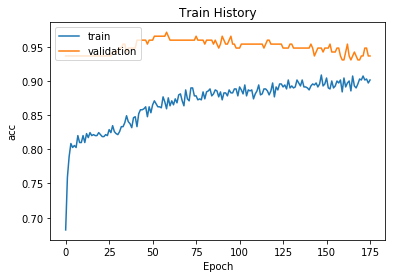

In [18]:
show_train_history(train_history,'acc','val_acc')

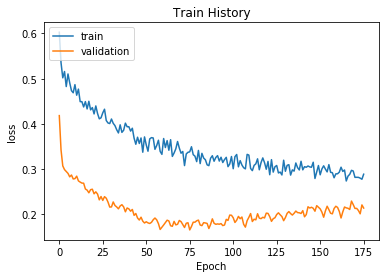

In [19]:
show_train_history(train_history,'loss','val_loss')

In [20]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

378/378 [==============================] - 0s 70us/step


In [21]:
scores[1]

0.8888888888888888

In [36]:
jack = [0,'male',25,'u','officer','v','S','F',1,1,1,1,1,1,1,1,1,1]

In [37]:
jack_df = pd.DataFrame([list(jack)],columns = ['suicide', 'sexuality', 'age', 'Education', 'rank', 'militaryservice', 'Time','testResult', 'suicideHistory', 'hadSuicideMessage', 'confirmedDisease','emotionalProblems', 'mentalillness', 'familySuicideHistory','familyMembers', 'workplacePressure', 'EconomicIssues','personalPressure'])

In [38]:
jack_df

,suicide,sexuality,age,Education,rank,militaryservice,Time,testResult,suicideHistory,hadSuicideMessage,confirmedDisease,emotionalProblems,mentalillness,familySuicideHistory,familyMembers,workplacePressure,EconomicIssues,personalPressure
0,0,male,25,u,officer,v,S,F,1,1,1,1,1,1,1,1,1,1


In [39]:
all_Features,Label,_=PreprocessData(jack_df)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [40]:
all_Features

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]])

In [41]:
all_probability=model.predict(all_Features)

In [42]:
all_probability

array([[0.4576002]], dtype=float32)

In [28]:
model.save("model_20190117.h5")